# CS446/519 - Class Session 10 - Closeness centrality

In this class session we are going to scatter plot the harmonic-mean closeness centralities
of the vertices in the gene regulatory network (from Pathway Commons) with the degree centralities.

Load in the SIF file for Pathway Commons

In [3]:
sif_data <- read.table("shared/pathway_commons.sif",
                       header=FALSE,
                       stringsAsFactors=FALSE,
                       col.names=c("species1",
                                   "interaction_type",
                                   "species2"),
                       quote="",
                       comment.char="")

Restrict the rows of the dataframe to "controls-expression-of", and eliminate redundant edges in the edge-list. Note that this is a directed graph, so A->B and B->A are separate edges.

In [4]:
interac_grn <- sif_data[sif_data$interaction_type %in% c("controls-expression-of"), c(1,3)]
interac_grn_unique <- unique(interac_grn)

Create a directed graph in igraph, from the dataframe edge-list, using `graph_from_data_frame`. Print a graph summary too, just as a sanity check.

In [5]:
library(igraph)
grn_igraph <- graph_from_data_frame(interac_grn_unique, directed=TRUE)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



For one vertex at a time, compute that vertex's harmonic mean closeness centrality using Eq. 7.30 from Newman's book. Don't forget to eliminate the "0" distance between a vertex and itself, in the results you get back from calling `distances`.  VERY IMPORTANT: make sure you specify a single source vertex to the `distances` function!  Just for information purposes, wrap system.time around your code. Distances should be calculated on the undirected graph, regardless of edge direction (this appears to be the default for `distances`).

In [6]:
N <- length(V(grn_igraph))
harmonic_closeness_centralities <- sapply(V(grn_igraph),
                                            function(my_vertex) {
                                                my_dists <- distances(grn_igraph, v=my_vertex)
                                                sum(1/my_dists[my_dists > 0])/(N-1)
                                          })

Histogram the harmonic-mean closeness centralities

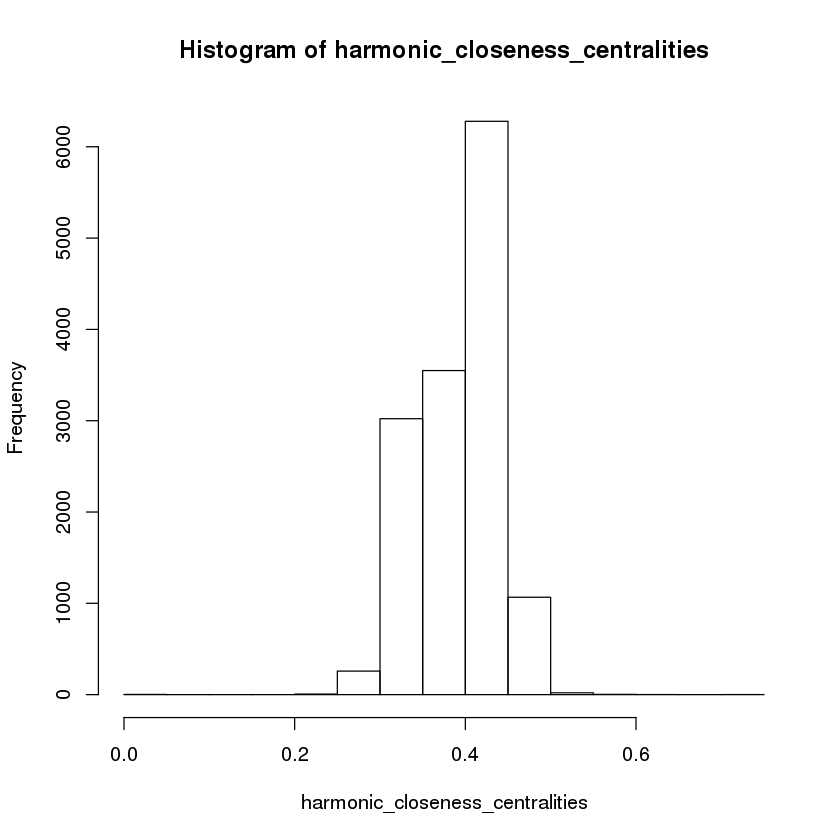

In [7]:
hist(harmonic_closeness_centralities)

Scatter plot the harmonic-mean closeness centralities vs. the log10 degree

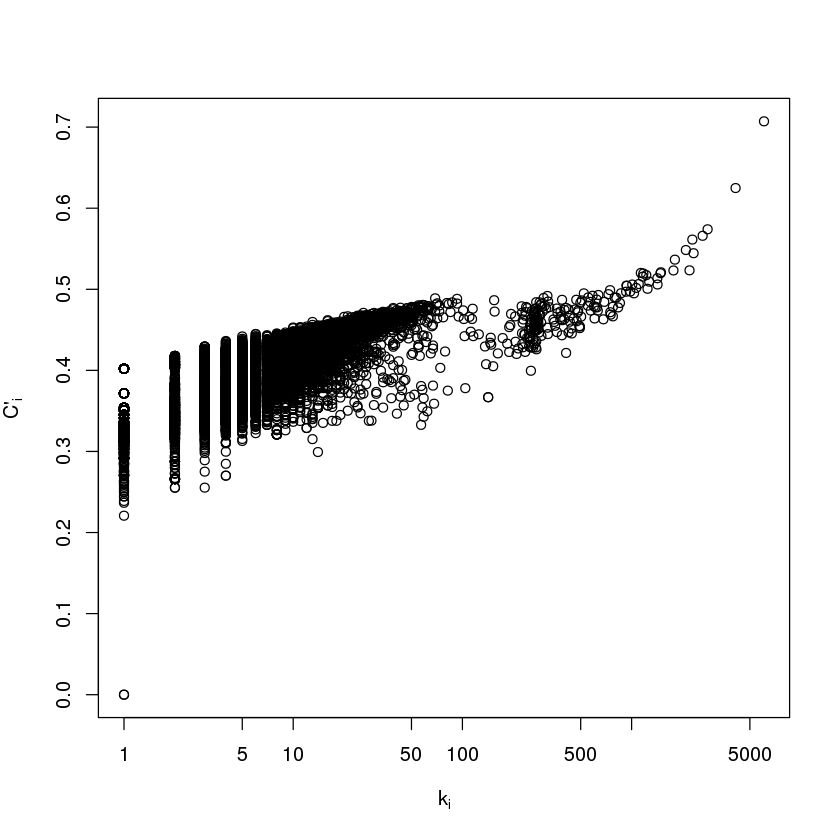

In [8]:
plot(degree(grn_igraph), harmonic_closeness_centralities,
     xlab=expression(k[i]),
     ylab=expression("C'"[i]),
     log="x")

which protein has the highest closeness centrality in the network? (hint: use `which.max`)

In [9]:
harmonic_closeness_centralities[which.max(harmonic_closeness_centralities)]

CYP26A1 
0.707169

In [11]:
which.max(degree(grn_igraph))

CYP26A1 
    163